Data Description :-

- Date : Date of trading

- Open : Price at which security first trades

- High : Highest Price of the trading day

- Low : Lowest Price of the trading day

- Close : Last Price the stock traded during the trading day

- Adj Close : Price that is adjusts Coroporate Actions on Closing Price

- Volume : Number of Shares that changed hands during the trading day

# 1. IMPORTING AND ANALYZING THE DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error,accuracy_score

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [5]:
print('No. of Observations: {}\nNo. of Parameters: {}'.format(data.shape[0],data.shape[1]))

No. of Observations: 2011
No. of Parameters: 7


-> As we can see, there are 2011 trading days even though the number of days in this period of time is much larger than 2011. This is because the stock market is not open on weekend and some USA's speacial days such as Independence day, Christmas Day, New Year's Eve and so forth.

In [6]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.duplicated().sum()

0

- There are no missing values and duplicates values.

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


The data type of our Date column should be converted into an appropriate format so that we can work with that variable when visualizing the data.

In [10]:
#Converting to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [12]:
#Setting Date as Index 
data.set_index('Date',inplace=True)

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# 2 EXPLORATIVE DATA ANALYSIS(EDA)


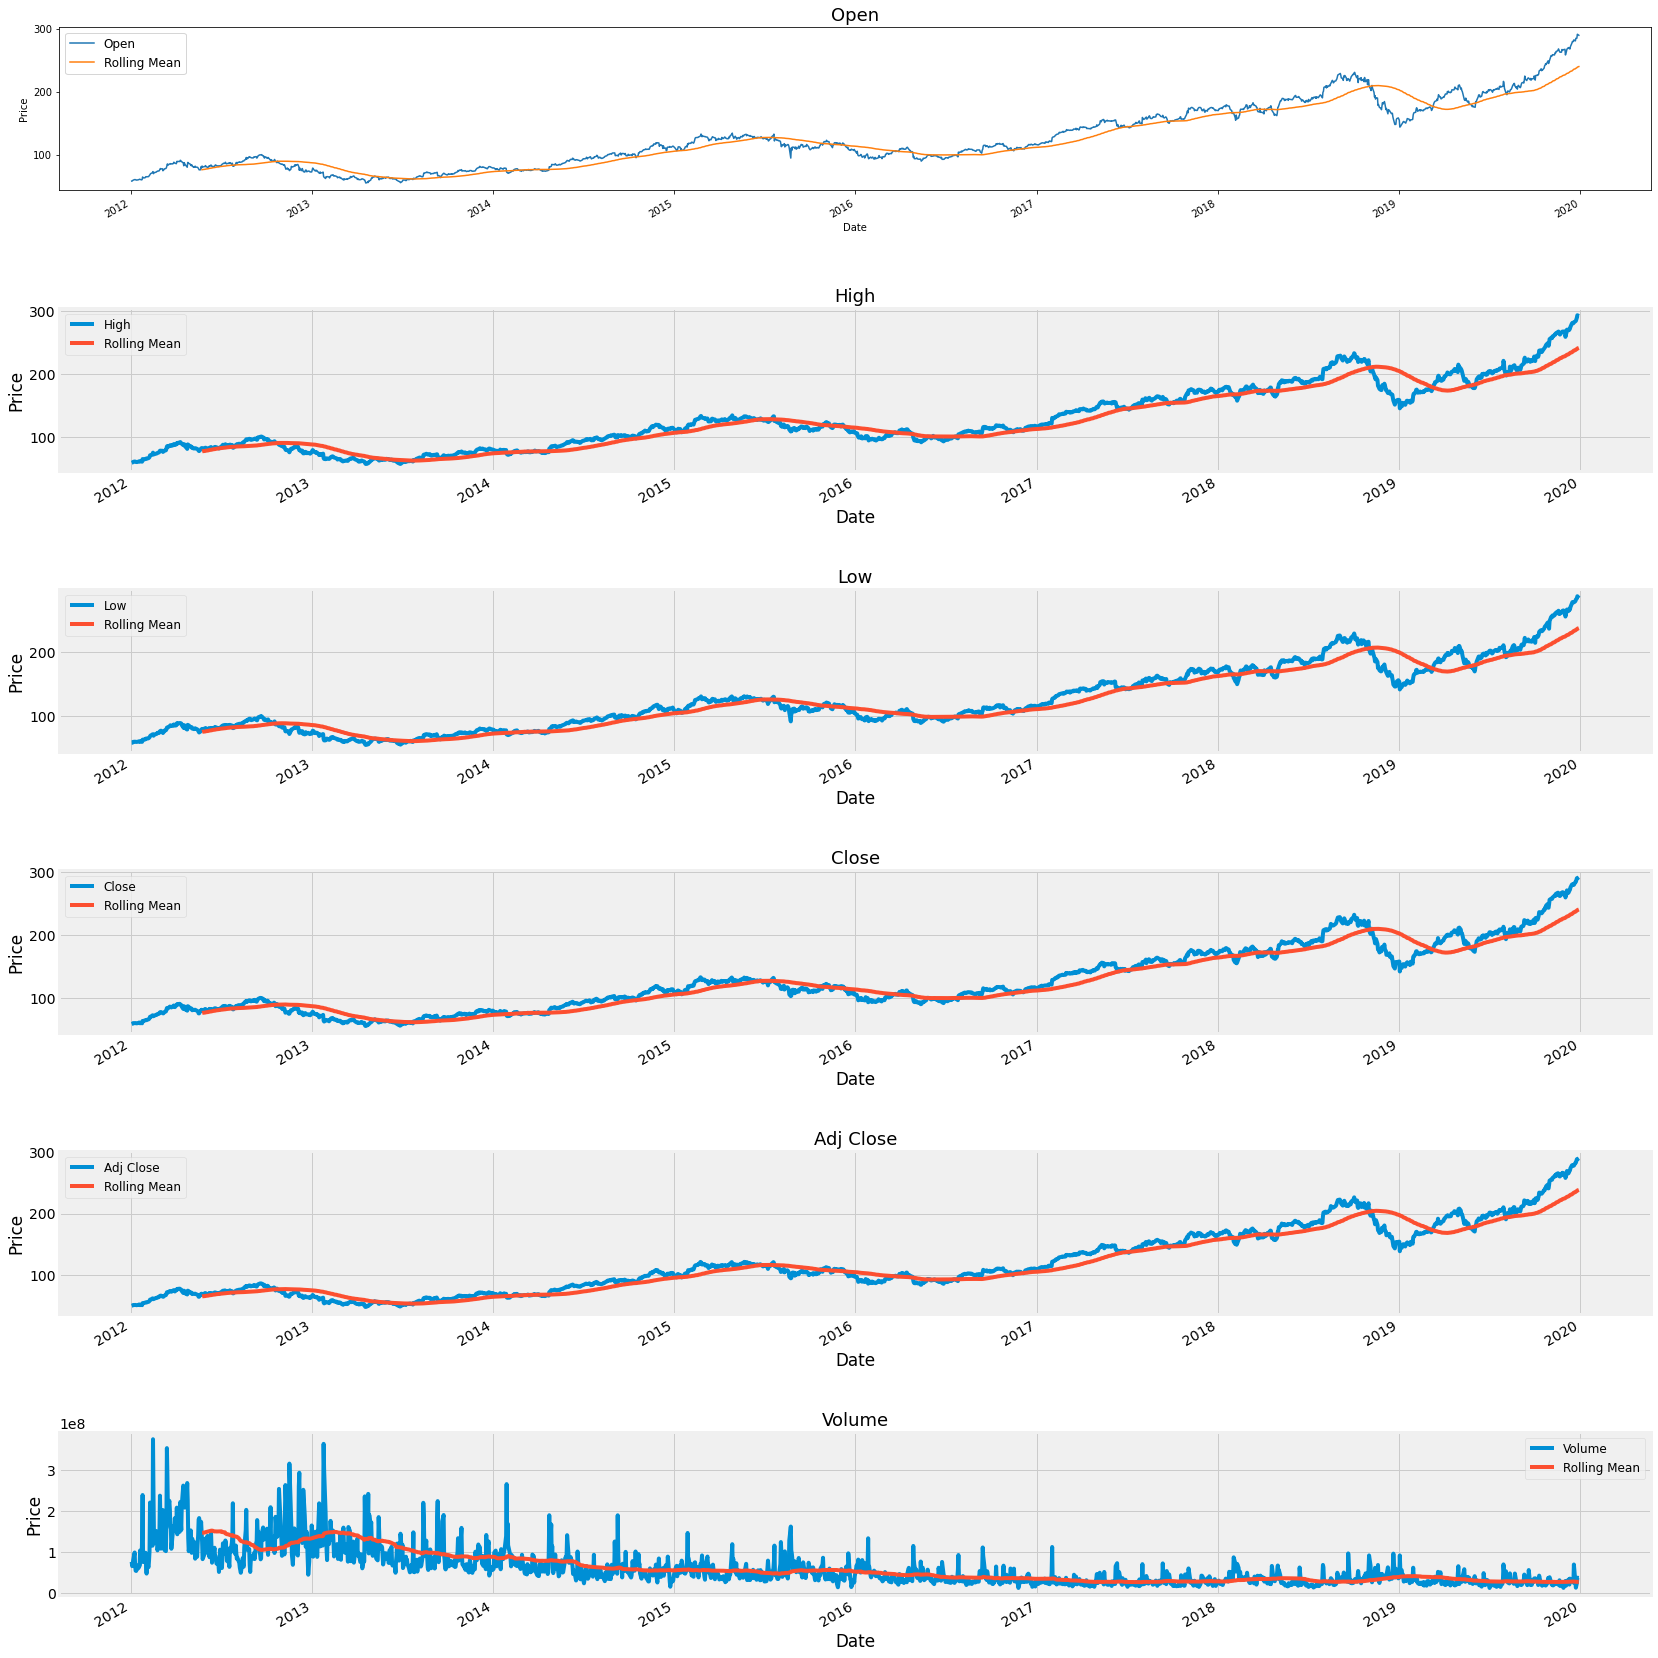

In [14]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    ax.plot(data.iloc[:,i],label=col_names[i])
    data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
    ax.set_title(col_names[i],fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.patch.set_edgecolor('black')  
    plt.style.context('fivethirtyeight')
    plt.legend(prop={'size': 12})
    plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

- The rolling average has a smoother curve than the stock_price curve.

Text(0.5, 1.0, 'HeatMap')

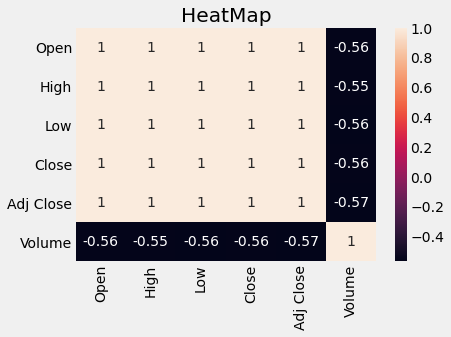

In [15]:
sns.heatmap(data.corr(),annot=True)
plt.title('HeatMap')

- We can eliminate features like Open,Low, High, Adj Close automatically as they are high multicollinear with Close. We consider Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

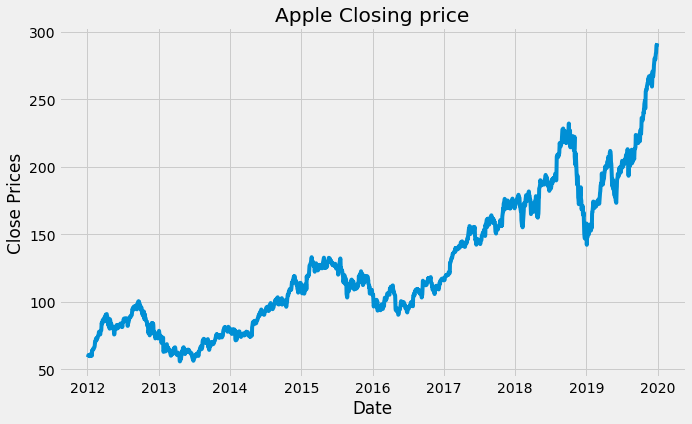

In [16]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Apple Closing price')
plt.show()

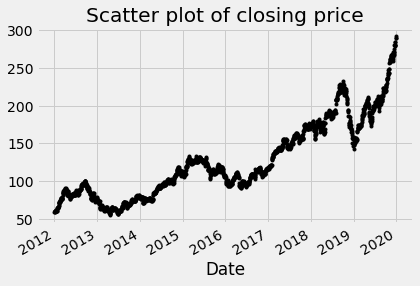

In [17]:
 #scatterplot:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [18]:
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data

,Close
Date,
2012-01-31,61.225428
2012-02-29,71.081572
2012-03-31,82.501104
2012-04-30,86.571857
2012-05-31,80.667597
...,...
2019-08-31,204.957728
2019-09-30,217.994999
2019-10-31,235.286521


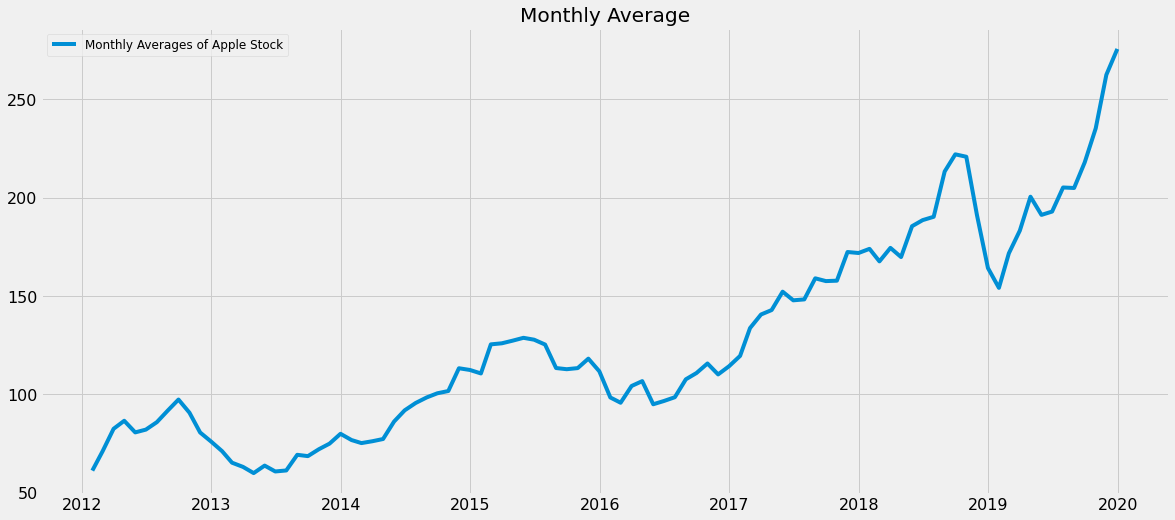

In [19]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Averages of Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.title('Monthly Average')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [20]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,61.225428,2012,January,Tuesday,1
2012-02-29,71.081572,2012,February,Wednesday,1
2012-03-31,82.501104,2012,March,Saturday,1
2012-04-30,86.571857,2012,April,Monday,2
2012-05-31,80.667597,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,204.957728,2019,August,Saturday,3
2019-09-30,217.994999,2019,September,Monday,3
2019-10-31,235.286521,2019,October,Thursday,4


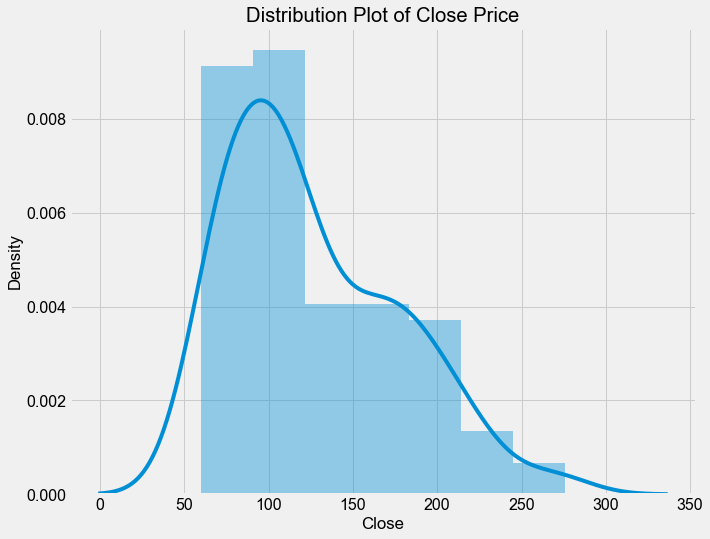

In [21]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot of Close Price")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

- Data is Right Skewed

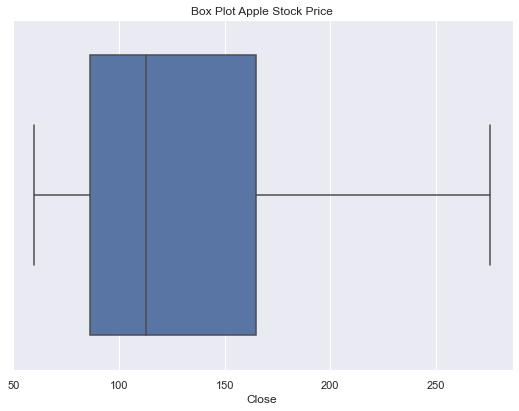

In [22]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

- No outliers

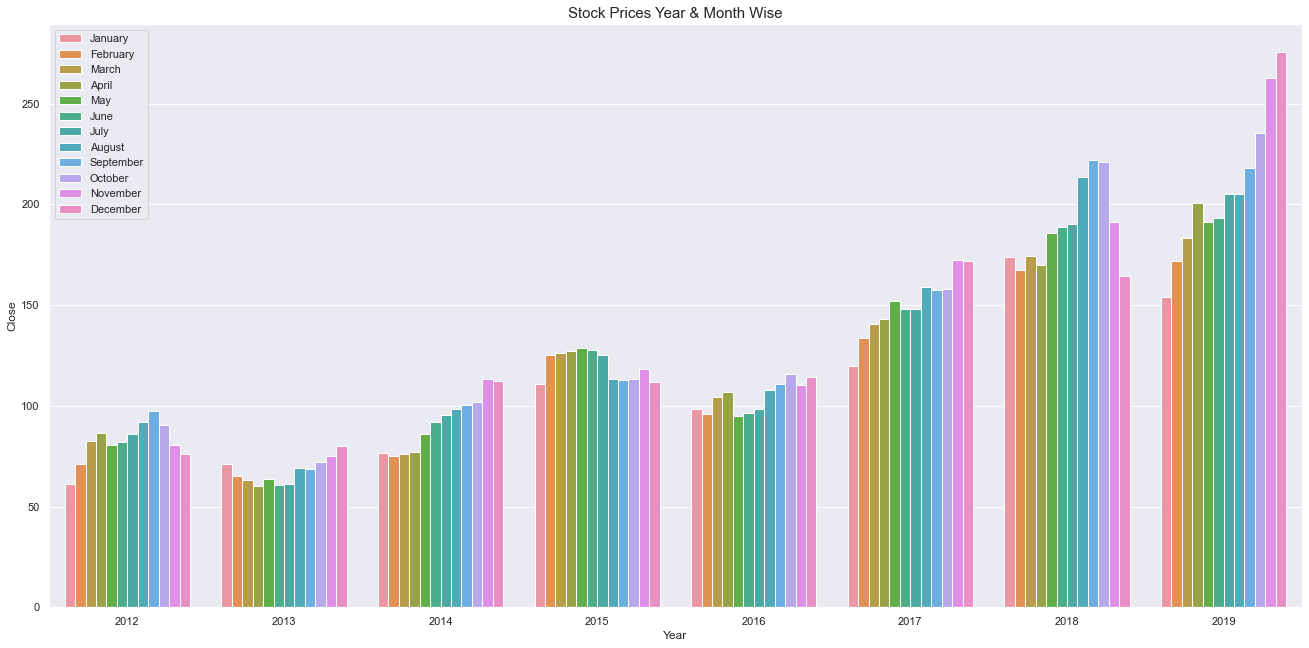

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

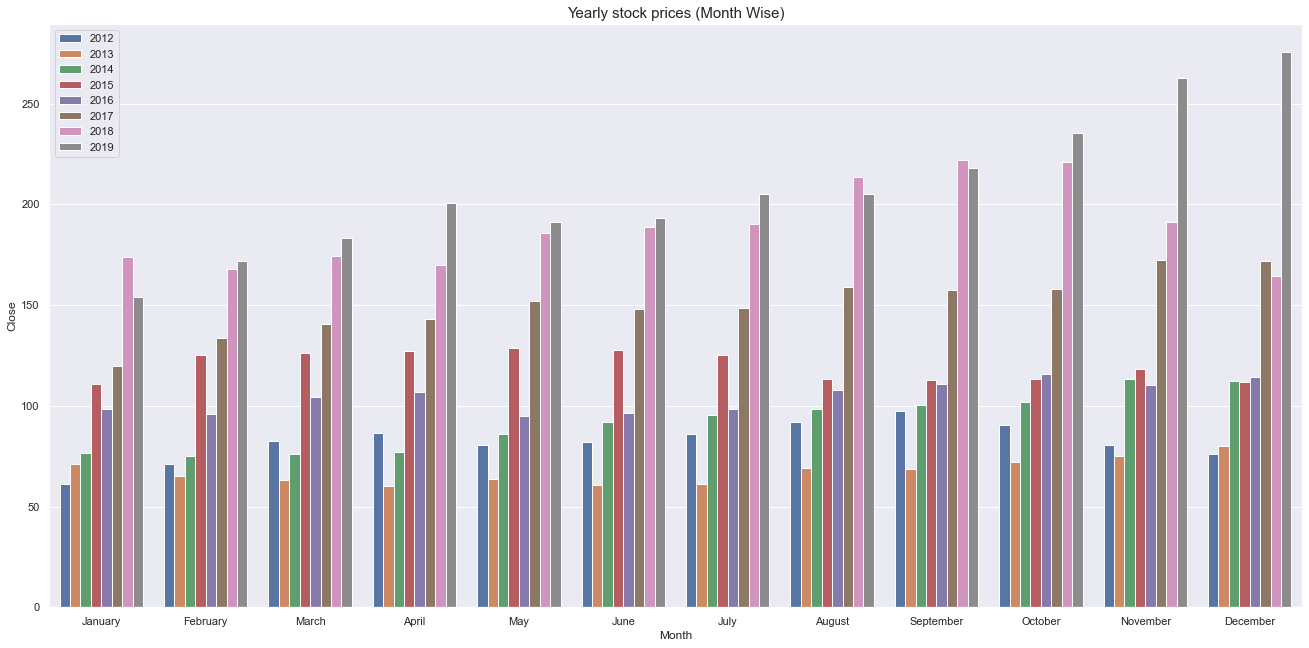

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Month", y="Close",hue = 'Year',data=monthly_data)
a.set_title("Yearly stock prices (Month Wise)",fontsize=15)
plt.legend(loc='upper left')
plt.show()

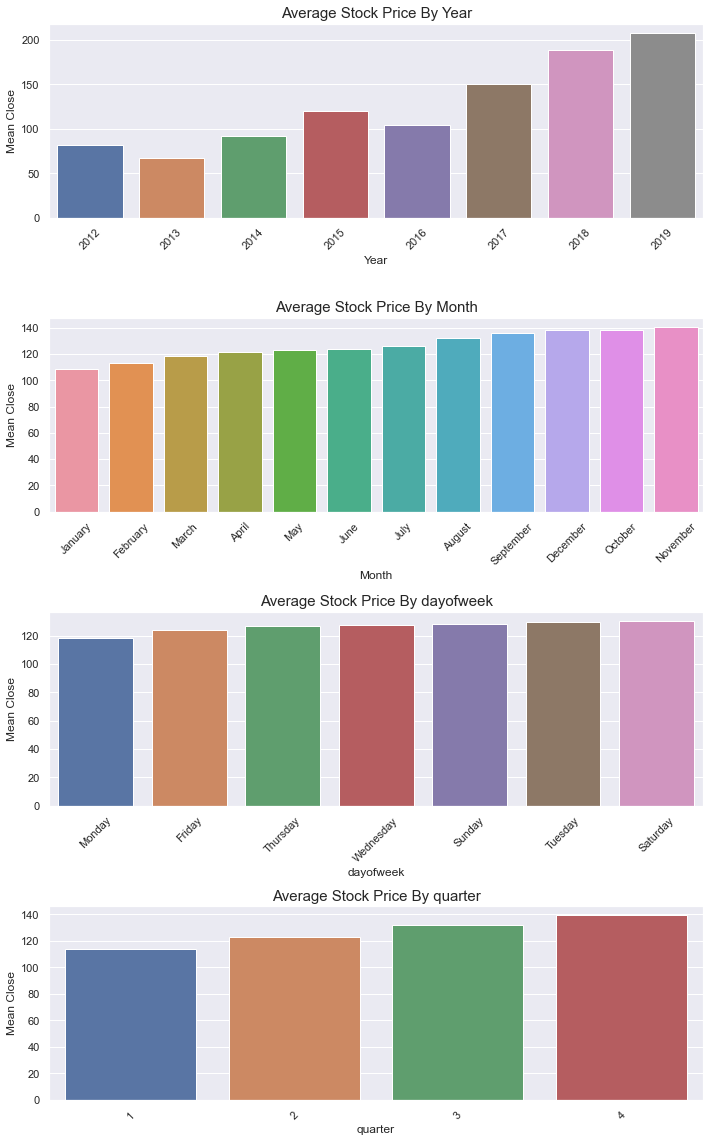

In [25]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

- According to Mean price by Years, there is a constant increase in stock price from 2017.


- Average Stock Price is lower at start of the week in comparision to the end of the week.


- The Average Price increases in the las6 months of the year.


- Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

# 3. MODEL BUILDING / TESTING

## 3.1 Decomposition of Time Series
- A statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.

<Figure size 1440x1440 with 0 Axes>

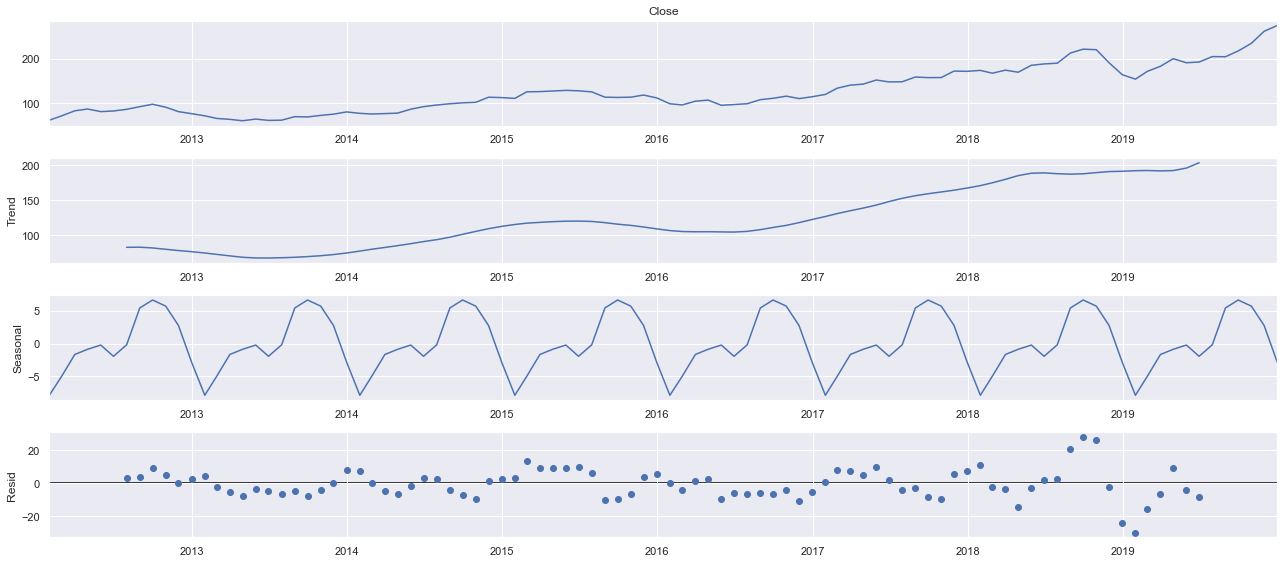

In [26]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,20))
decomposed_series = sd(monthly_data['Close'],model='additive')
decomposed_series.plot()
plt.show()

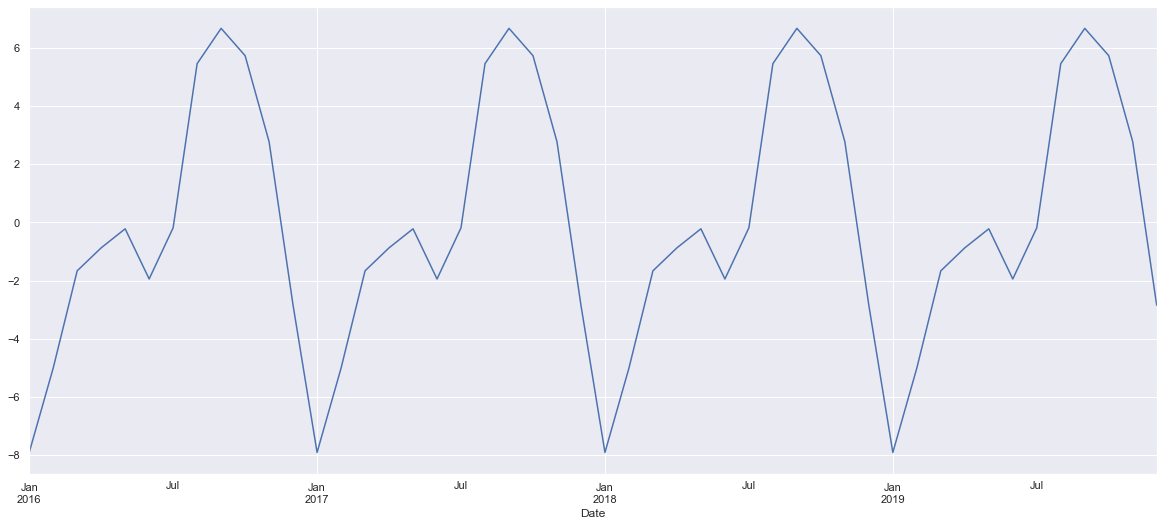

<Figure size 576x576 with 0 Axes>

In [27]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2016':'2019'].plot()
fig = plt.figure(figsize=(8,8))

## 3.2 Checking for stationarity

In [28]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
    result_ad_fuller = adfuller(X)
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print('p-value: %f' %result_ad_fuller[1])
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key, value))
        if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
            print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
        else:
            print('Failed to Reject Ho-Time Series is Non-Stationary')


In [29]:
ad_fuller_func(monthly_data['Close'])

ADF Statistic: 0.512110
p-value: 0.985237
Critical Values:
	1%: -3.502
Failed to Reject Ho-Time Series is Non-Stationary
	5%: -2.893
Failed to Reject Ho-Time Series is Non-Stationary
	10%: -2.583
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test

#### AutoCorrelation Function(ACF)

Text(0.5, 0, 'Lags')

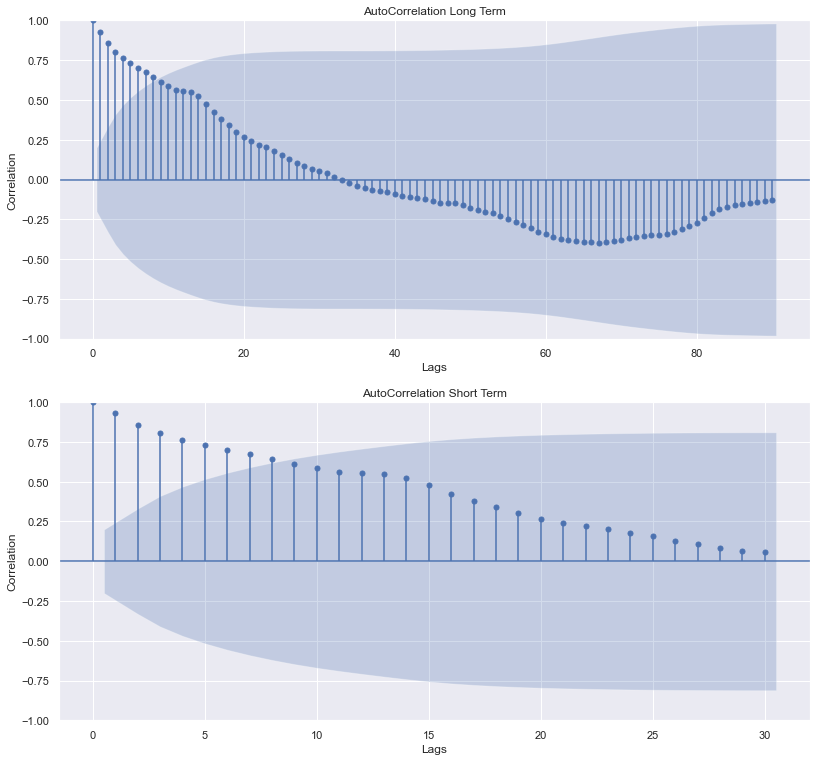

In [30]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Interpreting ACF Plot :-

->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

->Also tells us series is Non-stationary

->It indicates a MA(1) process

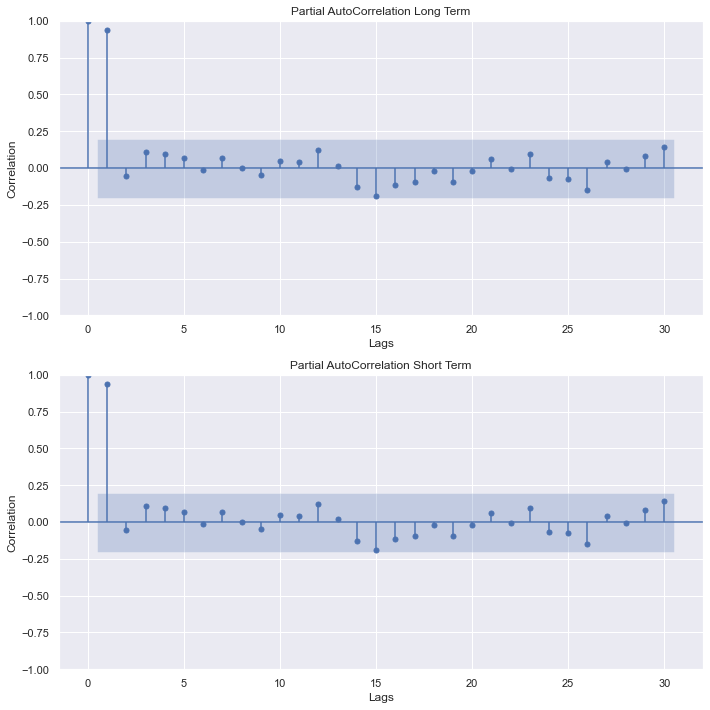

In [31]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Close'],lags=30,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

Interpreting PACF Plot :-

->Sudden Decay at Lag-1



## 3.3 Transformations To Make Series Stationary


In [32]:
##Differencing By 1
monthly_diff = monthly_data['Close'] - monthly_data['Close'].shift(1)


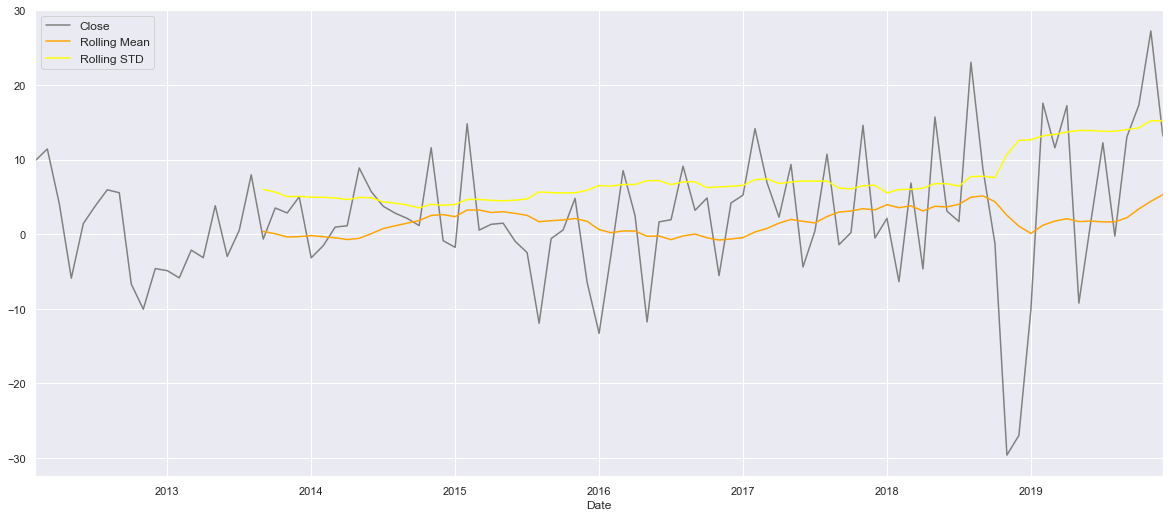

In [33]:

monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})


The series looks stationary as its having constant mean and variance .

In [34]:

##Checking if Time Series is Stationary by Running ADF Test
monthly_diff.isna().sum()
monthly_diff.dropna()
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.555009
p-value: 0.000000
Critical Values:
	1%: -3.502
Reject Null Hypothesis(Ho)-Time Series is Stationary
	5%: -2.893
Reject Null Hypothesis(Ho)-Time Series is Stationary
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


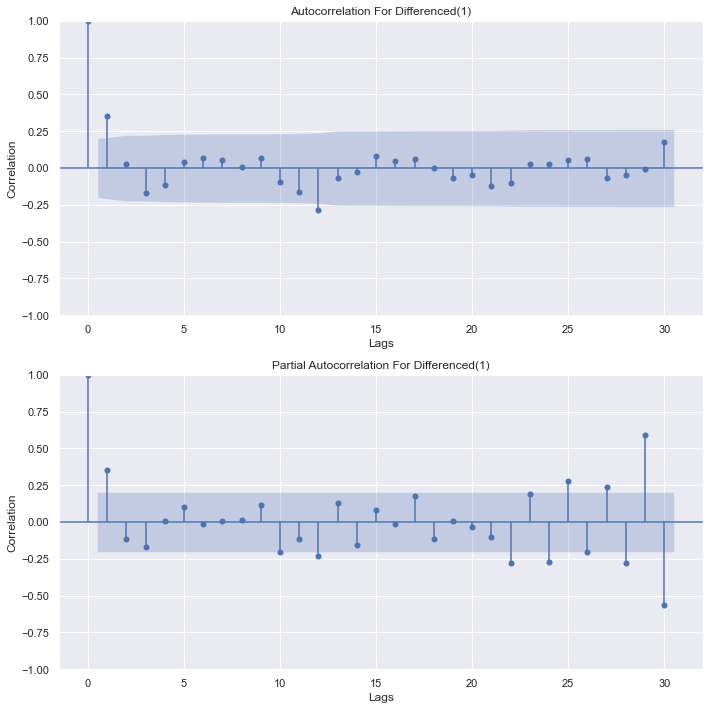

In [35]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

# Seasonal-ARIMA

In [36]:
modelling_series = monthly_data['Close']
train,test = split(modelling_series,train_size=0.76,shuffle=False)

In [37]:

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


Carrying out Grid Search to Select Parameters especially for Seasonal Component of the Time Series .

Parameters for Series already indicate Non-Seasonality Part with Order (1,1,1).

AR(1) derived by the PACF plot

MA(1) derived by the ACF Plot

Differencing(1) derived by differencing and observing stationarity.

### Hyper-Tuning

In [38]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:867.3352670465737
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:689.5012206681896
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:544.1112623840193
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:575.3889564691427
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:464.0770182888914
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:340.37090903380385
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:500.9498876980189


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1604.5432561435196
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:218.42677738851046
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:576.9467796512017
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:530.1463519839418
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:413.8818035885319
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:470.5740186535015
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:463.3915439059745
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:341.1896262624456
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:371.0406599296769


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1402.1395250253445
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:208.59308494069404
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:436.39891620043556
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:410.0215881870148
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:399.3353637184619
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:361.68801392852504


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:363.94826103220765
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:331.18085386714205
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:193.97075674013286
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:195.78586362396004
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:210.58817144368538
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:767.0120292177128
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:605.5159578094704
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:477.11644109297214
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:501.2100077543387
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:403.20536663073665
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:293.3884981198033
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:439.701624862789
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:2587.4563696387986
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:190.25771392466697
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:512.3224822655984
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:464.17028482823986
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:364.52195152581646
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:418.5059446512626


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:2606.020065460395
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:188.1093269256993
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:390.75648438209464
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:368.4050574049254


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:354.2136380598289
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:321.9411692928928
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:323.9272204666542
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:291.69764842415157
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:187.3084266621417
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:206.8668684593231


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:195.85164739504037
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:689.3793347596169
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:539.1568129261228
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:428.13423251999086
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:465.34060379367384
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:370.66876762405815
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:270.16957144980375
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:412.1588415390642


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:1150.345566946555
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:177.59398111938128
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:487.4293095814651
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:441.86470417404814


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:353.8574793845996
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:392.8182246793627
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:371.7645036736038
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:272.0433138381955
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:318.74990232996817


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:1308.096427717807
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:177.60460928493876
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:374.5093927177158


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:352.8841112187399


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:334.20815006864973
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:301.0064239702733
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:302.90386406262684
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:265.6540254117592


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:189.07669843853165
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:189.71139182877235


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:168.58420199893055
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:455.1897088445012
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:377.4750702554713
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:307.95104607532966
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:422.40591664726884
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:313.80863886922816
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:235.15196396576505
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:382.80407672514013


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:1431.597424632786
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:172.91350995099532
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:382.90948085088286
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:378.96953554517347
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:309.9440603232665
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:333.9468127329365
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:315.09425949902305
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:233.49811777557545
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:286.7422616532098


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:1306.726618428968
ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:175.8731434368135
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:313.8443735525251
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:315.77936938187236
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:306.8368309392497
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:243.0767886937432
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:237.73847162500763
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:230.06667063181922
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:184.21503081049573


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:737.193697727153
ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:176.69686606596122
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:444.2268855683564
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:371.98504825923237
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:302.6505072160113
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:414.2393528378703
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:310.2971460638205
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:228.67388973877144
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:375.11623635079496


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:1294.5848008462995
ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:165.85267271429058
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:382.91081946594215
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:373.501650109584
ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:304.46586847221425
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:334.7658416035683
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:309.6321690404795
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:227.66747626602617
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:287.7312601549631


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:1269.2099814400437
ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:170.49616415923353
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:313.6191663533093
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:315.56678947078984
ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:300.06398197189776
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:243.79554015814017
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:236.12561746388582
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:220.0877993232878
ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:185.7580682688598


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:920.3596262251813
ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:169.8513341637581
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:440.7606215913053
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:367.8378911506104
ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:298.3807522392727
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:409.6472450852975
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:307.02181004318044
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:222.78085010907
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:369.31986041270704
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:1333.5324029414874
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:159.15487749961122
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:384.35371359786853
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:369.25994201517926
ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:299.3716379333916
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:336.4846781859892
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:305.11758065562725
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:222.3236001011177
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:289.684908712946
ARIMA(

C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:1227.59668982295
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:178.66742697975394
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:406.8858942604365
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:402.6133027955933
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:327.32336818214884
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:352.37446953309814
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:332.498404181615
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:243.380313864888
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:294.59864028069734
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:1461.3918449930595
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:183.93372523761846
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:330.06125305915486
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:332.0097937931989
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:321.17670684275083
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:255.55653888244044
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:243.59284825263228
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:231.88089943679083
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:193.4148768444795


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:928.9158802462821
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:177.73707980668576
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:446.03609957671694
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:366.36967015365286
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:296.47922867530536
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:414.70876161702915
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:305.26669900222726
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:228.89601757912016
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:371.9147296737072


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:1314.7742355719797
ARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:161.21394612975342
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:377.3897077149506
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:367.1908295827893
ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:298.41302148593985
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:332.1385291476991
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:307.57476834755266
ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:226.55543042568468
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:282.84253665311587


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:1392.0314703717568
ARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:165.62985638937977
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:306.59414892776886
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:308.593955041762
ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:294.93256593241495
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:242.69312882029195
ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:237.99942954436386
ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:221.57549997327143
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:181.69029668247936


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:933.56901384317


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:165.21386389496146
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:435.1185141524724
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:360.4187374022552
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:291.7884003979499
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:405.9236373631416
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:301.0787827668416
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:221.38208277335403
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:364.9407026356316


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:1206.665941415269
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:154.24888773461703
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:378.780316871275
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:362.03786870492695
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:292.6849504378185
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:333.76835550095234
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:301.5274959182023
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:221.0243186599259
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:284.84252065280594


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:1281.5902246296428
ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:158.59466066865838
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:308.2655941043362
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:310.2641396333495
ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:290.4873325245321
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:242.96657355049146
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:236.16219995319955
ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:213.46849135527623
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:179.0830664518217


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:886.4568271965404
ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:154.12489081675227
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:460.73910312334704
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:379.2927543353947
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:310.3337704103638
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:433.44449173667164
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:321.46245678325766
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:248.56894885063184
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:393.18491312914887


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:1460.1051480632018
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:182.16052620187045
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:378.5072948639466
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:380.2169983159266
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:312.2669930343276
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:335.9401851052824
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:323.4429674414753
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:246.48598032765
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:288.3478482128099
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:1478.794339014336
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:185.72670537806553
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:308.5260480274921
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:310.4681806690983
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:308.8287485467203
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:245.06827317309555
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:239.59145267377883
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:238.92186178246845
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:182.77302754649193
ARIMA

C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:1283.316174331012
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:175.43287104646518
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:380.2519491446854
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:375.733094518996
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:308.6123768245946
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:336.7181592685777
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:317.5537415030441
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:235.51544728017132
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:288.93946782527985


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:1241.3312809841418
ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:179.03587346027945
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:310.41945952866536
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:312.35738522347515


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:304.90816054875006
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:245.71119229129596
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:238.10167465964392
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:230.1536152985476
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:181.1898744048001
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:181.9967166177193


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:178.8945992108865
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:445.9689284340877
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:368.3663295478539
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:300.7686108301881
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:417.7002236305894
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:314.65819098666987
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:230.80361426912359
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:377.5519782595206
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:1456.6760323707656
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:167.76623976824885
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:380.0398424432343
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:369.5057371817185


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:302.70546641051396
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:338.4715823108201
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:312.8854074681971
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:230.38712644005483
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:290.7796161873047
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:1474.7518170720334
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:173.1781958786134
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:309.29078210416174
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:311.27296898895924


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:299.68065149525074
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:244.6351031822465
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:240.01865927394138
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:223.88675463389464
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:183.19202110852325
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:182.86766644352252


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:172.49328192681457
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:452.66445202979827
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:377.7480620787314
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:308.7714297377508
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:421.8925971446346
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:317.17931570611
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:235.9033832368461
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:382.92805279029443


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:1390.643876298273
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:174.1814958678522
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:377.39963421563516
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:379.3113623393101
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:310.77138266729474
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:328.6762659279776
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:316.04229362322957
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:233.36457534352704
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:276.5680190836006


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:1362.6892990013782
ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:177.78618744658758
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:308.49465015048605
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:310.4561431589236
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:307.109242041613
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:236.81433333689907
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:229.86164798556408
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:229.11181151941898
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:179.03987641351395


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:745.8399135914544
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:178.0026430926474
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:445.2695942818693
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:372.63636818074593
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:304.08270409851747
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:416.23839289369323
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:310.2529334541403
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:229.34449819004735
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:375.98135003765174


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:1358.3609045482683
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:167.024858092703
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:378.2608211821138
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:374.2513144387529
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:306.06843517432577
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:329.4077948517985
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:311.09391947283757
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:228.8889415058117
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:277.7983459319099


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:1331.39302506709
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:172.04856166126763
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:309.30485557113957
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:311.27627058691667
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:301.5686105882866
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:237.42559131113384
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:231.96487253903226
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:222.05628776562037
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:178.96074219512863


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:922.4404389805068


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:171.02488808166572
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:446.0664095513095
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:369.01488835888415
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:299.74178038678696
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:411.3558493585195
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:308.97864623398243
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:224.5285688334494
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:370.5183382174169
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:1335.5325432306286
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:161.14534490945604
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:380.7316621560579
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:370.20625854888954
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:301.6622747693666
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:331.40280707445214
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:306.8026292713774
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:223.96319050886908
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:279.7972823537411
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:1275.1928357118838


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:168.4382183859869
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:471.73412312993054
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:393.8077698610492
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:320.56478789011544
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:435.32446515401745
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:328.25318335353
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:243.98733957460337
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:388.98537990675794


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:1332.7182588936164
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:178.74935431699436
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:393.50781697857207
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:395.47769071247416
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:322.55957257062425
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:340.31024852747544
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:328.4443045226486
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:240.85866995436544
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:280.86674527750125


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:1412.3751621693746
ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:180.71335631396286
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:319.0933792840989
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:321.0591845861822
ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:317.46804528249635
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:246.5636358430885
ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:234.74573774282774
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:232.61554182497505
ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:183.79748632538187


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:1017.4189571935276
ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:182.712806698302
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:444.2475553733984
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:367.9142175911427
ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:298.4390611360742
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:416.4115690203932
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:307.2663790856429
ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:230.14273865268018
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:373.91186224733667


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:1247.162896338858
ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:163.2067677961059
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:372.7527033504574
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:368.50324076881066
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:300.29066490209783
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:327.3865374381897
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:309.1985157289769
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:227.17775754262433
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:276.2211382627608


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:1324.4411078435833
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:167.50433171427645
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:302.1305199723776
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:304.1296754145721
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:296.9169958494152
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:234.67285567654426
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:227.61505765327283
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:220.56269748653094
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:174.1651078379662


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:847.9010881533136
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:164.70184905107197
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:436.3601337861896
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:360.8922668228737
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:292.27971617258606
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:405.4470560370859
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:300.7638685293134
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:219.36319306069456
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:365.61171615265005


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:1062.2867390979632
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:155.132199057038
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:372.68839909872975
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:362.3797526812592
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:293.24732860875054
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:327.5902875316596
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:302.76914179375177


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:221.3176987669442
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:275.17625250615174
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:1154.1020149356348
ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:158.55907018925902
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:302.1945170115553
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:304.035631568154
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:291.03689503874256
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:234.72578081742458
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:228.37161845834677
ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:215.43447809673367
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:170.22526446815579


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:840.5632535562736


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:160.57275131979904
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:452.4748878749938
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:380.98083738640054
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:312.20900511880717
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:423.2173112439532


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:323.4613095790623
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:249.3083403451793
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:383.6009702992361


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:1422.5156822966353
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:184.1569700862696
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:374.29742708428773


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:375.7683355805051
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:314.14129607641087
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:330.6469070662778
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:317.8814118319911
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:244.91539661540597
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:277.03835489598583


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:1202.6958309787544
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:187.71770968034846
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:304.9094026038068
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:306.9092639425459


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:305.2019837478055
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:238.57553780693905
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:231.86919343503783
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:231.06229424481242
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:174.39420145098185
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:175.5771967753287


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:179.307419421522
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:454.7169554719627
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:375.4530044317517
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:307.8832350520347
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:422.6288373970156
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:318.5496645196404
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:237.05796095603506
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:376.4149399973812


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:1406.794533567056
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:177.32414810292545
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:375.1146721085208
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:376.5587550703132


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:309.6673660970321
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:331.602412670262
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:321.9626096554426


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:236.6656208135252
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:274.03042672673223


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:1420.062136901402
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:180.94590027053718
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:305.4105989887721
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:307.38222809513434


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:305.9653305626029
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:239.19123721729932
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:232.79894064363458
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:232.15094915444968
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:175.79577764228222
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:176.98070126435618


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:180.18435355852353
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:447.9050118900881


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:370.1370238154857


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:302.7156314862863
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:418.1019980665906
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:315.80785497174156


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:232.32170266128622
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:370.50671861783724
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:1630.241239284247


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:169.73385377556494
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:375.67297297360255


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:371.4059591072044


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:304.624309212673
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:334.1664850719431
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:314.7921051191431


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:231.9339985546191
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:275.9815184005824


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:1641.2735120342263


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:174.17280955163355


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:305.3511619090847


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:307.3141922481323


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:301.9767351089279


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:239.04684101791727


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:239.59680503255112


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:224.04946128183252
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:177.51897592531625
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:178.36676262260957


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:177.93444789770467
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:446.54976826936195
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:379.4849503301008
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:309.99643043103714
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:416.2433373046468
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:317.806202784853
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:237.06624149646325
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:376.67166819915934


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:1469.6267047262309
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:171.4239878319547
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:373.63514730152525
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:375.55162398131847
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:311.9911123077774
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:324.10723429604883
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:310.9937781477004
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:235.23593870316913
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:271.3469461165136


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:1310.8191982964793
ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:177.7281883656157
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:304.4402006693593
ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:306.43133197553715
ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:302.7275048745813
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:226.41978874408215
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:221.92347700465362
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:221.6857264538291
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:165.9944940158918


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:977.3122121323761
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:172.68870752060678
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:450.23602118736625
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:374.6337974894931
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:305.80346776459305
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:418.24264902275434
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:315.2926944291313


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:236.02824379059604
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:380.45968144224577


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:368.3315717333785
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:166.4532614552811
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:374.45833192875386
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:376.2493999444349
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:307.72534440747
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:326.12462601684047


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:313.1933494413399


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:233.1070297680603
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:272.6217051856795


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:1128.724045881989
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:172.6597318859658
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:305.3362607162819
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:307.29447652711474
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:303.56832618402876


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:224.73941147376897


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:232.87772230777065
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:164.82932853098234


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:nan
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:164.6931992299979
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:443.8588592409864
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:369.48971071373273
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:300.28714791845726
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:411.2669334138642
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:308.98020125865685
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:223.08155952816045


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:368.85802892882276


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:1337.532451506863
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:154.49810240148875
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:374.66045549006293
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:370.493481640626
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:302.2023937337101
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:326.7244484105288
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:308.2503444638313
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:223.31819159161867
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:269.4018710742615
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:1287.3541583791643
ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:160.5888969663719
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:303.98963966846
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:305.87322985835374
ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:299.01307990616436
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:229.95995720063019
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:225.26763259033876
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:219.68575072931299
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:166.45390565379867


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:756.8725103507331
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:162.5836362232263
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:454.40343413709223
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:382.54006557401044
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:311.5603201418897
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:422.05949107168374
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:321.4317738533028
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:241.47374240883218
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:378.5257030568538


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:1558.226727388631
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:176.153558232426
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:376.72230170516264
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:378.6068771777018
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:313.53469802021385
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:327.0657042803371
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:316.9041657743927
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:239.33774466896924
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:270.9450339879595


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:1588.5260205899312
ARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:179.18811775650997
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:303.1899101197804
ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:305.1663266602992
ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:302.841913862819
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:234.7975964111654
ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:226.12866092531243
ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:224.73228535492183
ARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:172.37791294601223


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:973.1542791513687
ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:167.5752648175252
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:443.81057452319885
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:367.51987836388633
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:296.48266498843196
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:417.2883154841385
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:309.4591364113713
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:230.67526753632814
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:375.6116683502453


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:1304.5208736308132
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:165.05220414683325
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:366.56970006424444
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:367.61443565736795
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:298.4179942621279
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:320.81743329152624
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:309.4087565730507
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:228.91459837667378
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:269.59572626490353


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:1381.7886758577515
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:166.7428891429729
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:294.45998383841885
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:296.4508853706779
ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:296.61907855940257
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:225.28243814508772
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:221.5106264915069
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:221.13300371750282
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:163.21654393040268


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:844.6832818959024
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:161.2959855290332
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:438.3035724628847
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:358.88727385423397
ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:288.54004494981126
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:405.4571840270471
ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:304.4393768135731
ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:214.74847359400525
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:365.1295547368969


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:1250.8509161542127
ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:157.19539801811348
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:368.5335079233681
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:360.69948231505487
ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:288.07866216969876
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:321.6282151413047
ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:303.6255875165838
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:216.72900588631688
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:267.834362409293


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:1355.634529871789
ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:158.7027014913376
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:292.4526395238234
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:293.7642385396347


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:286.67249309110895
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:226.7929640545541
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:223.50406040890022
ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:217.08117060686828
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:157.47159268131972


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:842.9502232142406


C:\Users\Rumana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:144.62141707362517


>Akaike's Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model.

> By Observing the Lowest AIC , we come to Seasonality Order of (0, 2, 2, 12)12

In [39]:
#Spliiting data (2018 & 2019 data for testing)
train = monthly_data[:72]
test = monthly_data.Close[72:]

## 1. SARIMA Model 1

In [40]:
model=sm.tsa.statespace.SARIMAX(monthly_data['Close'],order=(1, 1, 1),seasonal_order=(2,2,0,12))
results=model.fit()

<AxesSubplot:xlabel='Date'>

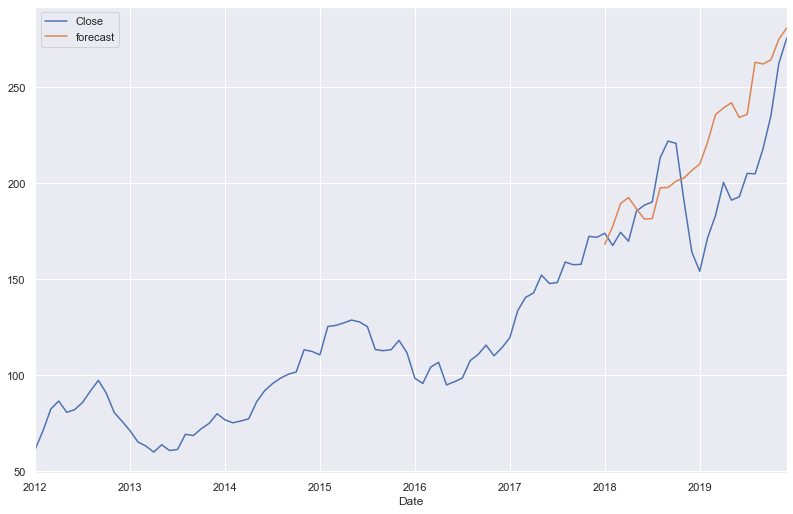

In [41]:
monthly_data['forecast']=results.predict(start=72,end=96,dynamic=True)
monthly_data[['Close','forecast']].plot(figsize=(12,8))

In [42]:
forecast =results.predict(start=73,end=96,dynamic=True)
#Mean Absolute Percentage Error
np.mean(np.abs(forecast-test)/np.abs(test))

0.18623131080314864

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(test, forecast)) 

46.84395197324156

## 2. SARIMA Model 2

In [ ]:
model2=sm.tsa.statespace.SARIMAX(monthly_data['Close'],order=(1, 1, 1),seasonal_order=(2,1,0,12))
results2=model2.fit()

<AxesSubplot:xlabel='Date'>

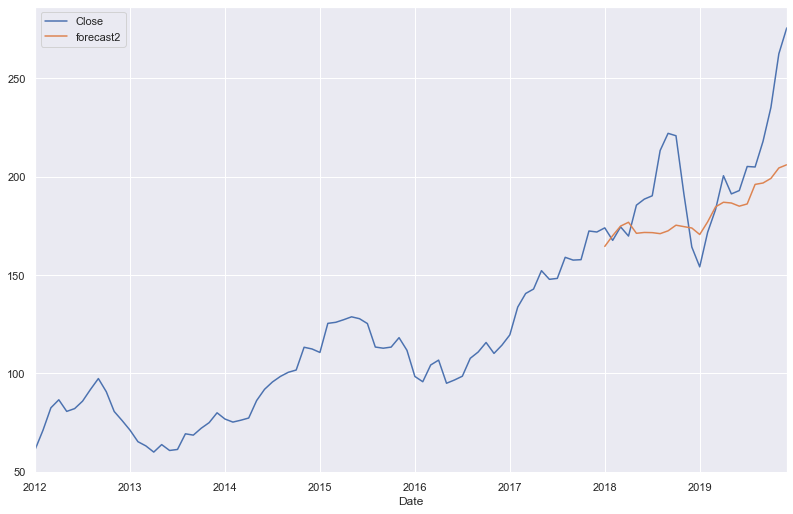

In [45]:
monthly_data['forecast2']=results2.predict(start=72,end=96,dynamic=True)
monthly_data[['Close','forecast2']].plot(figsize=(12,8))

In [46]:
forecast2 =results2.predict(start=73,end=96,dynamic=True)
#Mean Absolute Percentage Error
np.mean(np.abs(forecast2-test)/np.abs(test))

0.08531342291429239

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(test, forecast2)) 

22.250361630834906

## 3. SARIMA Model 3

In [48]:
model3 = sm.tsa.statespace.SARIMAX(monthly_data['Close'],order=(1, 1, 1),seasonal_order=(1,1,0,12))
results3=model3.fit()

<AxesSubplot:xlabel='Date'>

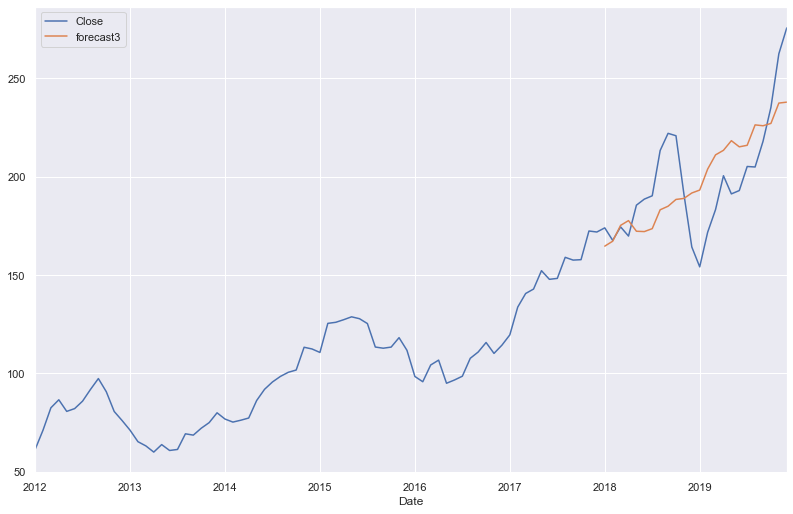

In [49]:
monthly_data['forecast3']=results3.predict(start=72,end=96,dynamic=True)
monthly_data[['Close','forecast3']].plot(figsize=(12,8))

In [50]:
forecast3 =results3.predict(start=73,end=96,dynamic=True)
#Mean Absolute Percentage Error
np.mean(np.abs(forecast3-test)/np.abs(test))

0.12726389295691737

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(test, forecast3)) 

30.691094542739652

## Comparing the above 3 models, we can conclude that Model-2 has the best RMSE and MAPE value, hence we will deploy model-2 

In [55]:
import pickle
pickle.dump(model2, open('sarima_model.pickle','wb'))

In [62]:
df = monthly_data[['Close']]
df['Date'] = df.index
df.dtypes

Close           float64
Date     datetime64[ns]
dtype: object

In [61]:
pickle.dump(df,open('df.pkl','wb'))